In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [4]:
img= cv2.imread('Happy.jpg')

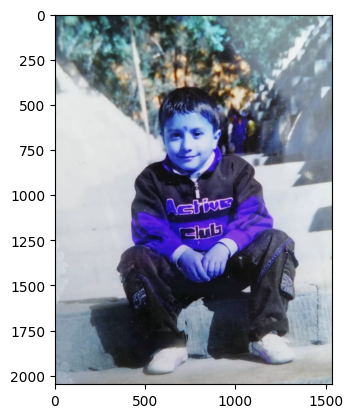

In [5]:
plt.imshow(img)

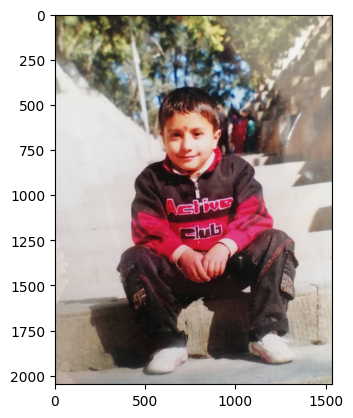

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
prediction = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /home/sujan/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.21MB/s]
2023-11-05 10:31:46.267816: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-05 10:31:47.024231: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-05 10:31:47.308419: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /home/sujan/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [01:03<00:00, 8.50MB/s] 
2023-11-05 10:32:57.734838: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-11-05 10:33:00.936659: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /home/sujan/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [01:08<00:00, 7.88MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /home/sujan/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:57<00:00, 9.37MB/s] 
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]   


In [9]:
prediction

[{'emotion': {'angry': 0.00661312515148893,
   'disgust': 3.176386442760304e-06,
   'fear': 0.14688920928165317,
   'happy': 19.18337494134903,
   'sad': 78.79839539527893,
   'surprise': 6.424997422982415e-05,
   'neutral': 1.864660158753395},
  'dominant_emotion': 'sad',
  'region': {'x': 866, 'y': 75, 'w': 122, 'h': 122},
  'age': 24,
  'gender': {'Woman': 7.754026353359222, 'Man': 92.24597215652466},
  'dominant_gender': 'Man',
  'race': {'asian': 0.165108114015311,
   'indian': 1.3424058444797993,
   'black': 1.2600517831742764,
   'white': 60.46285033226013,
   'middle eastern': 31.20509386062622,
   'latino hispanic': 5.564490333199501},
  'dominant_race': 'white'},
 {'emotion': {'angry': 9.223344345137861e-05,
   'disgust': 2.2036397132685417e-05,
   'fear': 3.0130315505284995,
   'happy': 85.51508697957318,
   'sad': 0.8302202011776091,
   'surprise': 0.003997379701079149,
   'neutral': 10.637546964737592},
  'dominant_emotion': 'happy',
  'region': {'x': 572, 'y': 545, 'w': 3

In [8]:
type(prediction[1])


dict

In [10]:
prediction[0]['dominant_emotion']

'sad'

In [11]:
#trying to draw a rectangle on he face
#haar is algorithm for face detection algorithm

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces: 
  cv2.rectangle(img, (x,y), (x+w,y+h), (100,255,0),2)

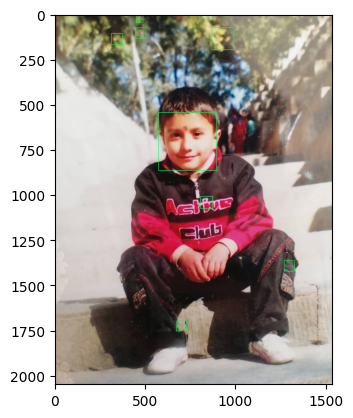

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
font = cv2.FONT_HERSHEY_COMPLEX

cv2.putText(img, prediction[0]['dominant_emotion'], 
            (50,50),
            font,3,
            (0,0,255),
            2,
            cv2.LINE_4); 


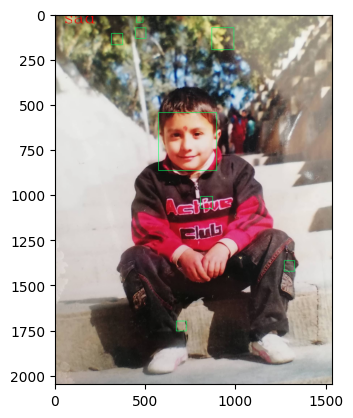

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Real time video demo for Face Emotion Detection

In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)

if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True: 
  ret,frame = cap.read()

  result = DeepFace.analyze(frame, actions = ['emotions'])
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  faces= faceCascade.detectMultiScale(gray,1.1,4)

  for (x,y,w,h) in faces: 
    cv2.rectangle(img, (x,y), (x+w,y+h), (100,255,0),2)

  font = cv2.FONT_HERSHEY_COMPLEX

  cv2.putText(img, result[0]['dominant_emotion'], 
            (50,50),
            font,3,
            (0,0,255),
            2,
            cv2.LINE_4); 
  cv2.imshow('Original video',frame)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


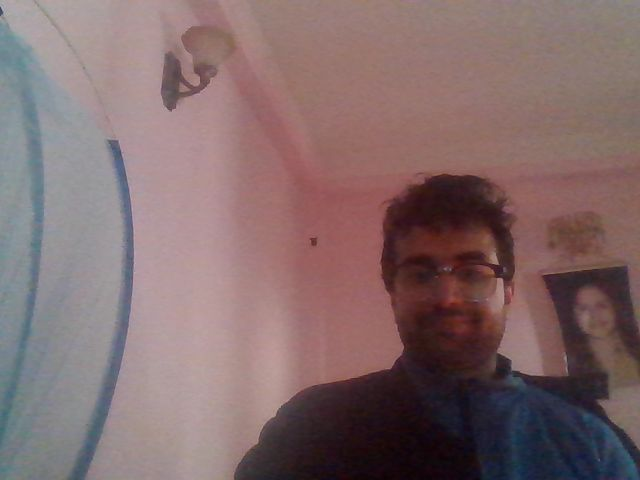

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
plt.imshow(cv2.cvtColor(filename,cv2.COLOR_BGR2RGB))

error: ignored